In [32]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
plt.rcParams['axes.unicode_minus'] = False
raw_df = pd.read_csv("107-112.csv", skiprows=1, header=None)
raw_df

0        1       2       3        4
0    1982-01-01   210351       0  210351        0
1    1982-02-01   232556       0  232556        0
2    1982-03-01   521868       0  521868        0
3    1982-04-01   391945       0  391945        0
4    1982-05-01   516644       0  516644        0
..          ...      ...     ...     ...      ...
497  2023-06-01  1971584  128847  303913  1223383
498  2023-07-01  2183695  170770  342294  1337212
499  2023-08-01  2420960  265340  610541  1227485
500  2023-09-01  2527784  142889  718825  1362788
501  2023-10-01  2378410  490825  412975  1186701

[502 rows x 5 columns]

迴歸係數: 1.5319080778514926
截距: 581479.3903132706
Solar發電量對Total發電量的影響係數：1.53


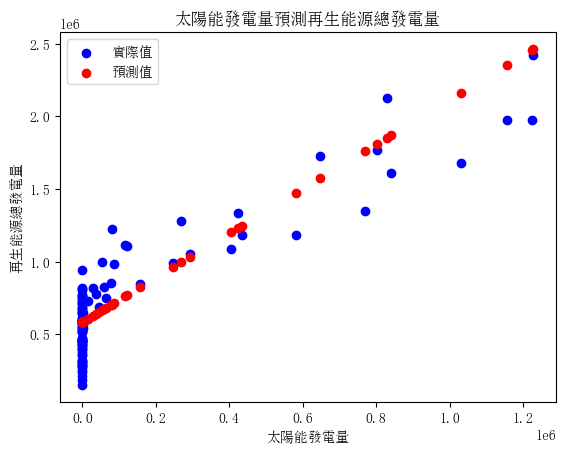

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# 讀取CSV文件，沒有跳過行，沒有列名
raw_df = pd.read_csv("107-112.csv", skiprows=1, header=None)

# 添加列名
raw_df.columns = ['日期', 'Total', 'Wind', 'Hydro', 'Solar']

# 提取自變量（Solar發電量）和因變量（Total發電量）
X = raw_df[['Solar']]
y = raw_df['Total']

# 將數據集分割為訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 創建線性回歸模型
model = LinearRegression()

# 訓練模型
model.fit(X_train, y_train)

# 獲取回歸係數和截距
slope = model.coef_[0]
intercept = model.intercept_

# 輸出回歸方程
print("迴歸係數:",slope)
print("截距:",intercept)
print(f"Solar發電量對Total發電量的影響係數：{slope:.2f}")
# 在測試集上進行預測
y_pred = model.predict(X_test)

# 可視化結果
plt.scatter(X_test, y_test, label='實際值', color='blue')
plt.scatter(X_test, y_pred, label='預測值', color='red', )
plt.xlabel('太陽能發電量')
plt.ylabel('再生能源總發電量')
plt.title('太陽能發電量預測再生能源總發電量')
plt.legend()
plt.show()



線性回歸： Total = 1.48 * Solar + 579667.41
迴歸係數: 1.4834775636837016
截距: 579667.4148852394


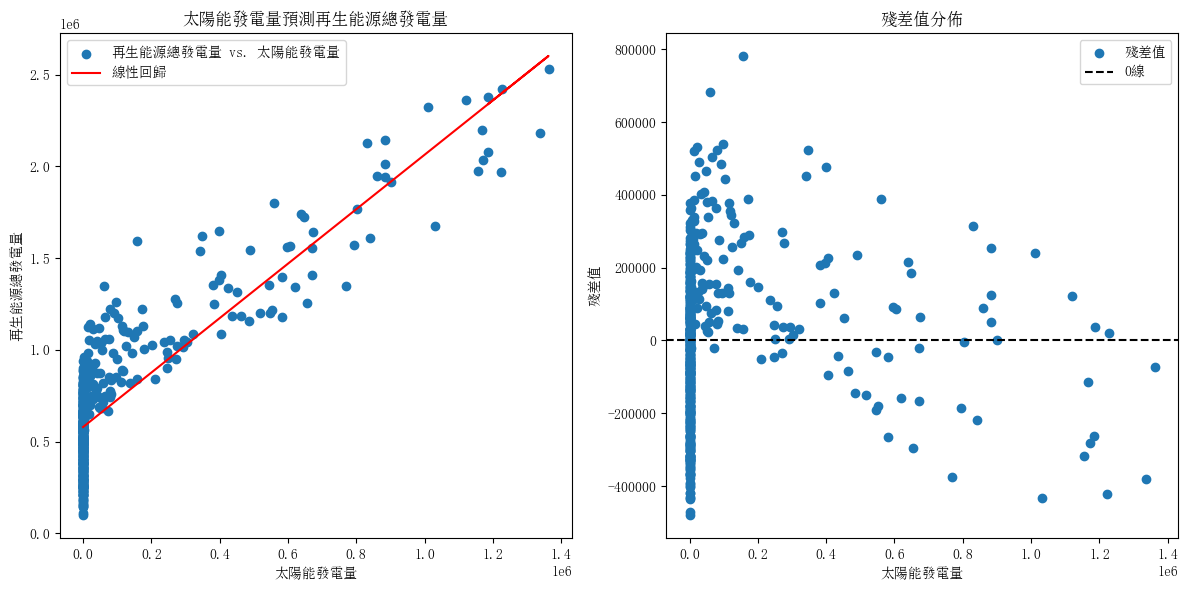

In [14]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# 讀取CSV文件，沒有跳過行，沒有列名
raw_df = pd.read_csv("107-112.csv", skiprows=1, header=None)

raw_df.columns = ['日期', 'Total', 'Wind', 'Hydro', 'Solar']

X = raw_df[['Solar']]
y = raw_df['Total']

# 模型
model = LinearRegression()
model.fit(X, y)

# 獲取迴歸係數與截距
slope = model.coef_[0]
intercept = model.intercept_

# 預測值
y_pred = model.predict(X)

# 計算殘差
residuals = y - y_pred

# 輸出迴歸係數、截距、殘差值
print(f"線性回歸： Total = {slope:.2f} * Solar + {intercept:.2f}")
print("迴歸係數:", slope)
print("截距:", intercept)


# 繪製散點圖和殘差圖
plt.figure(figsize=(12, 6))

# 散點圖
plt.subplot(1, 2, 1)
plt.scatter(X, y, label='再生能源總發電量 vs. 太陽能發電量')
plt.plot(X, y_pred, color='red', label='線性回歸')
plt.xlabel('太陽能發電量')
plt.ylabel('再生能源總發電量')
plt.title('太陽能發電量預測再生能源總發電量')
plt.legend()

# 殘差圖
plt.subplot(1, 2, 2)
plt.scatter(X, residuals, label='殘差值')
plt.axhline(y=0, color='black', linestyle='--', label='0線')
plt.xlabel('太陽能發電量')
plt.ylabel('殘差值')
plt.title('殘差值分佈')
plt.legend()

plt.tight_layout()
plt.show()


均方誤差 (MSE): 46432742834.27477
根均方誤差 (RMSE): 215482.5812781042
平均絕對百分比誤差 (MAPE): 37.20445520990386
迴歸係數: 1.4834775636837016
截距: 579667.4148852394
線性回歸： Total = 1.48 * Solar + 579667.41


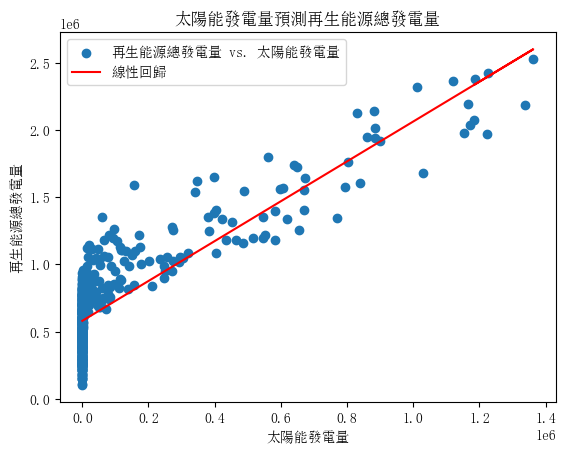

In [12]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimSun']
plt.rcParams['axes.unicode_minus'] = False

# 讀取CSV文件，沒有跳過行，沒有列名
raw_df = pd.read_csv("107-112.csv", skiprows=1, header=None)

raw_df.columns = ['日期', 'Total', 'Wind', 'Hydro', 'Solar']

X = raw_df[['Solar']]
y = raw_df['Total']

# 模型
model = LinearRegression()
model.fit(X, y)

# 預測值
y_pred = model.predict(X)

# 計算均方誤差 (MSE)
mse = mean_squared_error(y, y_pred)
print("均方誤差 (MSE):", mse)

# 計算根均方誤差 (RMSE)
rmse = np.sqrt(mse)
print("根均方誤差 (RMSE):", rmse)

# 計算平均絕對百分比誤差 (MAPE)
mape = np.mean(np.abs((y - y_pred) / y)) * 100
print("平均絕對百分比誤差 (MAPE):", mape)

# 獲取迴歸係數與截距
slope = model.coef_[0]
intercept = model.intercept_
print("迴歸係數:", slope)
print("截距:", intercept)
print(f"線性回歸： Total = {slope:.2f} * Solar + {intercept:.2f}")

# 繪製散點圖和回歸線
plt.scatter(X, y, label='再生能源總發電量 vs. 太陽能發電量')
plt.plot(X, y_pred, color='red', label='線性回歸')
plt.xlabel('太陽能發電量')
plt.ylabel('再生能源總發電量')
plt.title('太陽能發電量預測再生能源總發電量')
plt.legend()

plt.show()


均方誤差 (MSE): 78011567714.49443
根均方誤差 (RMSE): 279305.5096386293
平均絕對百分比誤差 (MAPE): 36.81370740552394
迴歸係數: 3.1636274921792014
截距: 535484.5749562383
線性回歸： Total = 3.16 * Solar + 535484.57


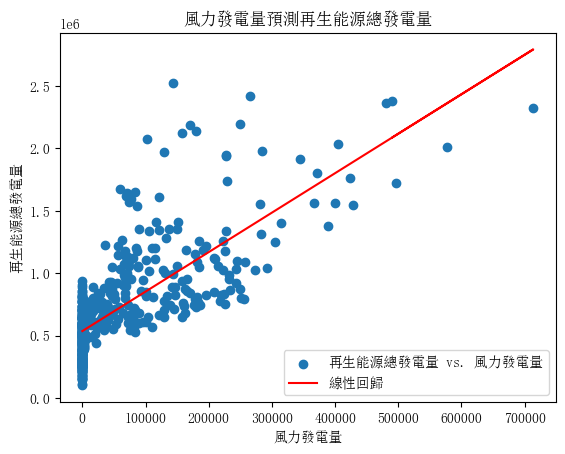

In [15]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimSun']
plt.rcParams['axes.unicode_minus'] = False


# 讀取CSV文件，沒有跳過行，沒有列名
raw_df = pd.read_csv("107-112.csv", skiprows=1, header=None)

raw_df.columns = ['日期', 'Total', 'Wind', 'Hydro', 'Solar']

X = raw_df[['Wind']]
y = raw_df['Total']

# 模型
model = LinearRegression()
model.fit(X, y)

# 預測值
y_pred = model.predict(X)

# 計算均方誤差 (MSE)
mse = mean_squared_error(y, y_pred)
print("均方誤差 (MSE):", mse)

# 計算根均方誤差 (RMSE)
rmse = np.sqrt(mse)
print("根均方誤差 (RMSE):", rmse)

# 計算平均絕對百分比誤差 (MAPE)
mape = np.mean(np.abs((y - y_pred) / y)) * 100
print("平均絕對百分比誤差 (MAPE):", mape)

# 獲取迴歸係數與截距
slope = model.coef_[0]
intercept = model.intercept_
print("迴歸係數:", slope)
print("截距:", intercept)
print(f"線性回歸： Total = {slope:.2f} * Solar + {intercept:.2f}")

# 繪製散點圖和回歸線
plt.scatter(X, y, label='再生能源總發電量 vs. 風力發電量')
plt.plot(X, y_pred, color='red', label='線性回歸')
plt.xlabel('風力發電量')
plt.ylabel('再生能源總發電量')
plt.title('風力發電量預測再生能源總發電量')
plt.legend()

plt.show()


均方誤差 (MSE): 157806427567.28775
根均方誤差 (RMSE): 397248.571510695
平均絕對百分比誤差 (MAPE): 49.06567938395552
迴歸係數: 0.7709399212387124
截距: 414040.2249961779
線性回歸： Total = 0.77 * Solar + 414040.22


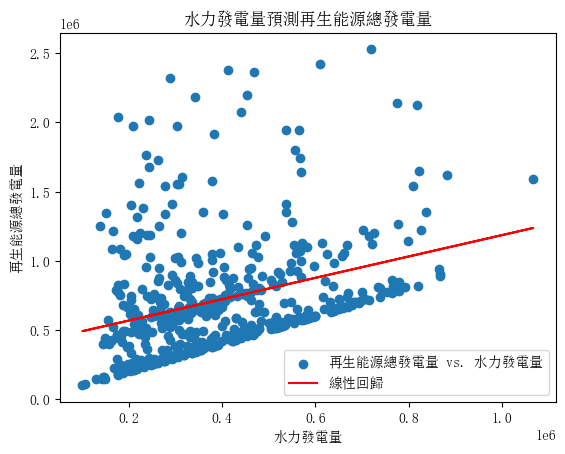

In [16]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimSun']
plt.rcParams['axes.unicode_minus'] = False


# 讀取CSV文件，沒有跳過行，沒有列名
raw_df = pd.read_csv("107-112.csv", skiprows=1, header=None)

raw_df.columns = ['日期', 'Total', 'Wind', 'Hydro', 'Solar']

X = raw_df[['Hydro']]
y = raw_df['Total']

# 模型
model = LinearRegression()
model.fit(X, y)

# 預測值
y_pred = model.predict(X)

# 計算均方誤差 (MSE)
mse = mean_squared_error(y, y_pred)
print("均方誤差 (MSE):", mse)

# 計算根均方誤差 (RMSE)
rmse = np.sqrt(mse)
print("根均方誤差 (RMSE):", rmse)

# 計算平均絕對百分比誤差 (MAPE)
mape = np.mean(np.abs((y - y_pred) / y)) * 100
print("平均絕對百分比誤差 (MAPE):", mape)

# 獲取迴歸係數與截距
slope = model.coef_[0]
intercept = model.intercept_
print("迴歸係數:", slope)
print("截距:", intercept)
print(f"線性回歸： Total = {slope:.2f} * Solar + {intercept:.2f}")

# 繪製散點圖和回歸線
plt.scatter(X, y, label='再生能源總發電量 vs. 水力發電量')
plt.plot(X, y_pred, color='red', label='線性回歸')
plt.xlabel('水力發電量')
plt.ylabel('再生能源總發電量')
plt.title('水力發電量預測再生能源總發電量')
plt.legend()

plt.show()


均方誤差 (MSE): 25110183274010.105
根均方誤差 (RMSE): 5011006.21372695
平均絕對百分比誤差 (MAPE): 45.83557457425579
迴歸係數: 11.441659261363746
截距: 7027365.171582507
線性回歸： Total = 11.44 * Solar + 7027365.17


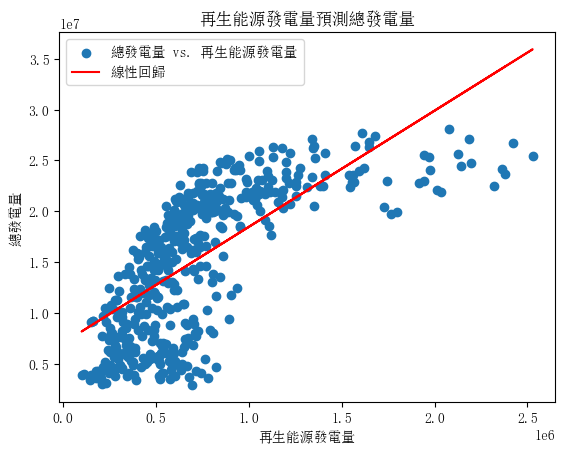

In [18]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimSun']
plt.rcParams['axes.unicode_minus'] = False


# 讀取CSV文件，沒有跳過行，沒有列名
raw_df = pd.read_csv("107-113.csv", skiprows=1, header=None)

raw_df.columns = ['日期', 'Total', 'TotalRE', 'Hydro', 'Solar']

X = raw_df[['TotalRE']]
y = raw_df['Total']

# 模型
model = LinearRegression()
model.fit(X, y)

# 預測值
y_pred = model.predict(X)

# 計算均方誤差 (MSE)
mse = mean_squared_error(y, y_pred)
print("均方誤差 (MSE):", mse)

# 計算根均方誤差 (RMSE)
rmse = np.sqrt(mse)
print("根均方誤差 (RMSE):", rmse)

# 計算平均絕對百分比誤差 (MAPE)
mape = np.mean(np.abs((y - y_pred) / y)) * 100
print("平均絕對百分比誤差 (MAPE):", mape)

# 獲取迴歸係數與截距
slope = model.coef_[0]
intercept = model.intercept_
print("迴歸係數:", slope)
print("截距:", intercept)
print(f"線性回歸： Total = {slope:.2f} * Solar + {intercept:.2f}")

# 繪製散點圖和回歸線
plt.scatter(X, y, label='總發電量 vs. 再生能源發電量')
plt.plot(X, y_pred, color='red', label='線性回歸')
plt.xlabel('再生能源發電量')
plt.ylabel('總發電量')
plt.title('再生能源發電量預測總發電量')
plt.legend()

plt.show()
